In [1]:
# import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.4.3'

In [3]:
# import data
df = pd.read_csv(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Data/Modified/food_price_global_clean.csv', index_col = 0)

In [4]:
df.head()

,_id,country,food_type,baseline_local,local_price,variation_local,local_currency,local_range,date
0,1,Isle Of Man,Bread and other bakers wares (1kg),2.80,2.89,3.21,£,1.61-3.99,2020-07-19
1,2,Marshall Islands,"Meat of chickens, fresh or chilled (1kg)",4.45,4.45,0.00,$,4.41-4.5,2020-07-19
2,3,Timor-Leste,Rice (1kg),1.88,1.92,2.13,$,0.75-3,2020-07-19
3,4,Burkina Faso,Potatoes (1kg),682.00,682.00,0.00,CFA,600.01-763.99,2020-07-19
4,5,Angola,"Meat of cattle, fresh or chilled (1kg)",10.84,12.43,14.67,$,9.68-15.61,2020-07-19


# Correlation Heatmap

In [5]:
%matplotlib inline

In [6]:
sub = df[['baseline_local', 'local_price']]

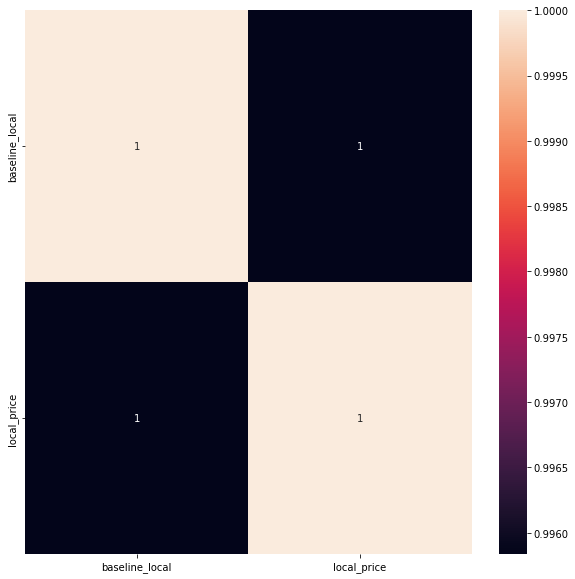

In [7]:
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

# Scatterplot

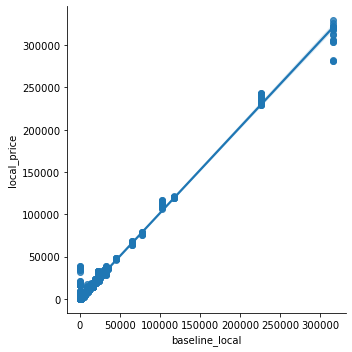

In [8]:
scp = sns.lmplot(y='local_price', x='baseline_local', data = df)

Local prices and baseline prices are supposed to be a very strong positive relationship, unless the region are under crisis. From the heatmap and scatterplot, it can prove that. Thus, if the absolute value of variation between local price and baseline price is too large, we should consider it as the outlier.

# Pair plot

In [9]:
# sub_2 = df[['country', 'food_type', 'baseline_local', 'local_price', 'variation_local', 'local_currency']]

In [10]:
# pp = sns.pairplot(sub_2)

# Find out the outliers on variation

<AxesSubplot:xlabel='variation_local', ylabel='Count'>

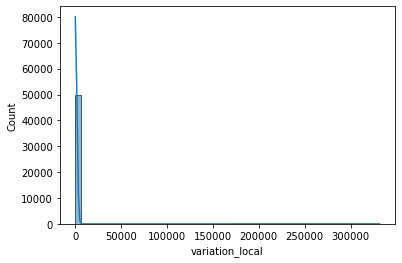

In [11]:
# Use a histogram to visualize the distribution of the variables.
sns.histplot(df['variation_local'], bins = 50, kde = True)

In [12]:
df['variation_local'].describe()

count     50000.000000
mean        882.919817
std       14303.654544
min         -98.620000
25%           0.000000
50%           3.570000
75%           9.930000
max      331704.770000
Name: variation_local, dtype: float64

<AxesSubplot:xlabel='variation_local', ylabel='variation_local'>

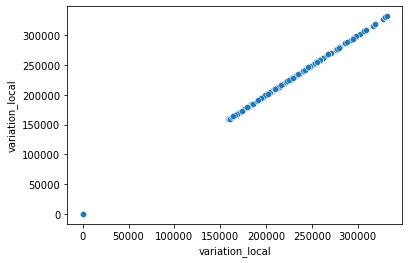

In [13]:
sns.scatterplot(x='variation_local', y='variation_local', data = df)

In [14]:
# According to normal distribution, the variables over 29490.3 are outliers.
var_out = df.loc[df['variation_local'] > 29490.3]

In [15]:
var_out['country'].value_counts()

Lebanon    112
Burundi     81
Name: country, dtype: int64

In [16]:
var_out.shape

(193, 9)

In [17]:
# Remove the outliers
df_var = df.loc[df['variation_local'] <= 29490.3]

In [18]:
df_var.shape

(49807, 9)

<AxesSubplot:xlabel='variation_local', ylabel='Count'>

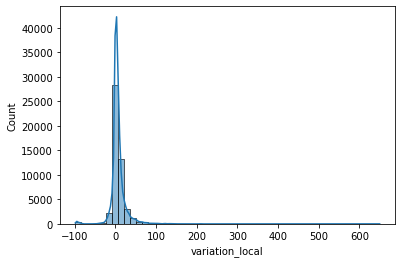

In [19]:
sns.histplot(df_var['variation_local'], bins = 50, kde = True)

In [20]:
# export the new data frame
df_var.to_csv(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Data/Modified/food_price_global_varclean.csv')

# Categorical plot

In [21]:
df_var.loc[df_var['variation_local'] < 0, 'var_level'] = 'Negtive'

/Users/r1121/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/r1121/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
df_var.loc[(0 <= df_var['variation_local'])&(df_var['variation_local'] < 100), 'var_level'] = 'Positive Regular'

In [23]:
df_var.loc[df_var['variation_local'] >= 100, 'var_level'] = 'Positive Large'

In [24]:
df_var['var_level'].value_counts()

Positive Regular    38082
Negtive             11516
Positive Large        209
Name: var_level, dtype: int64

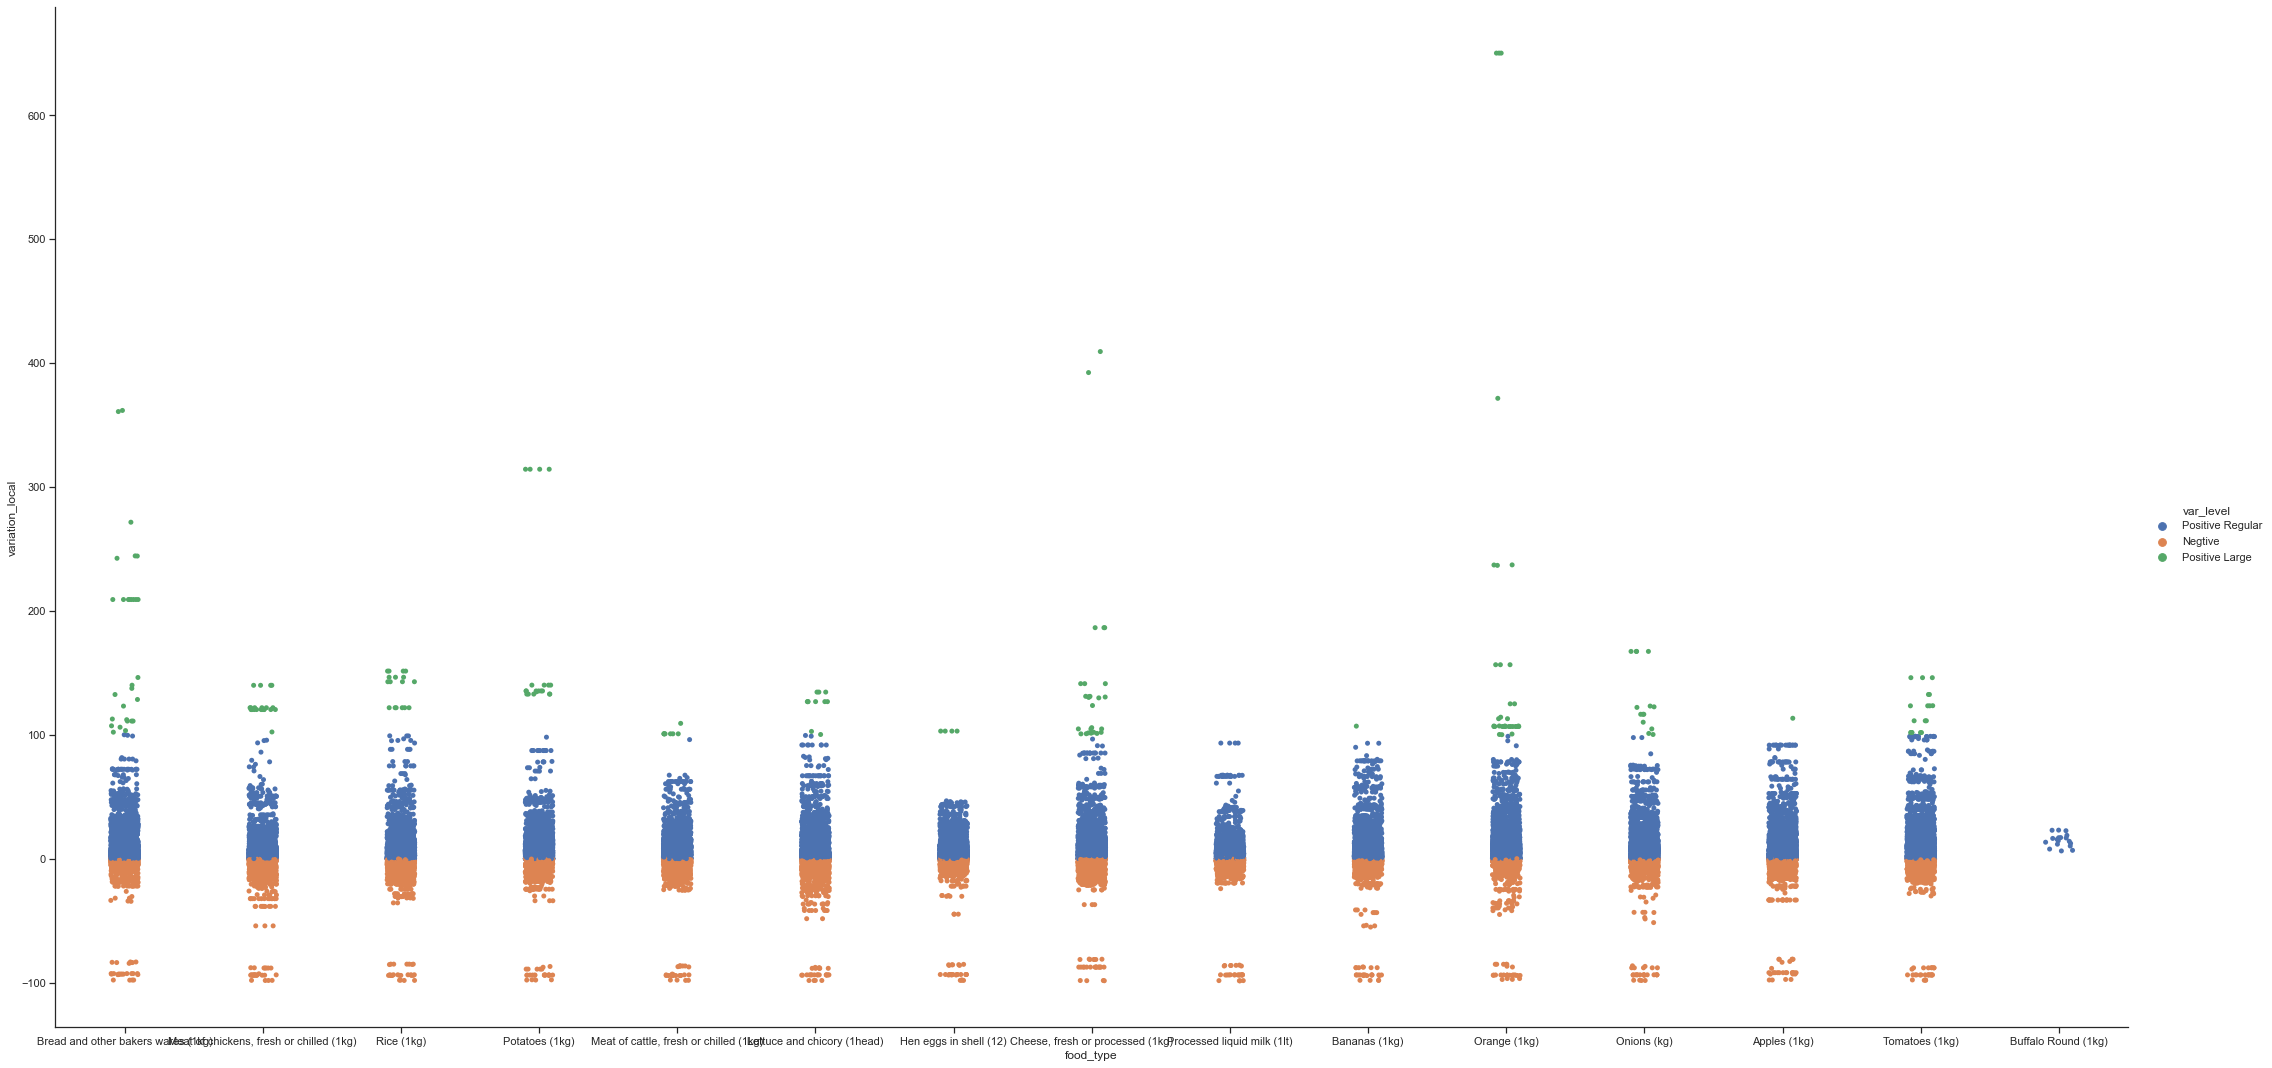

In [25]:
# Create a categorical plot in seaborn using the var_level categories created above with food_type
sns.set(style = 'ticks')
cp = sns.catplot(x = 'food_type', y = 'variation_local', hue = 'var_level', data = df_var, height = 15, aspect = 2)

From the categorical plot, we can see that the most varied food on price is orange. Variation of its price could be low negtive to high positive. Second one is cheese, but price of its ingredient -- milk is quite stable.

In [26]:
# export all charts
corr.figure.savefig(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Viz/correlation_baseline_localprice')

In [27]:
scp.figure.savefig(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Viz/scatterplot_baseline_localprice')

In [28]:
cp.figure.savefig(r'/Users/r1121/Desktop/CF/11-2023Food Price Project/Viz/categoricalplot_variation_foodtype')